In [31]:
import pickle
import matplotlib.pyplot as plt
import os
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

In [149]:
np.diag(search.results[i].regression_result.sigma_e)

array([1.10537349e-09, 1.07443257e-09])

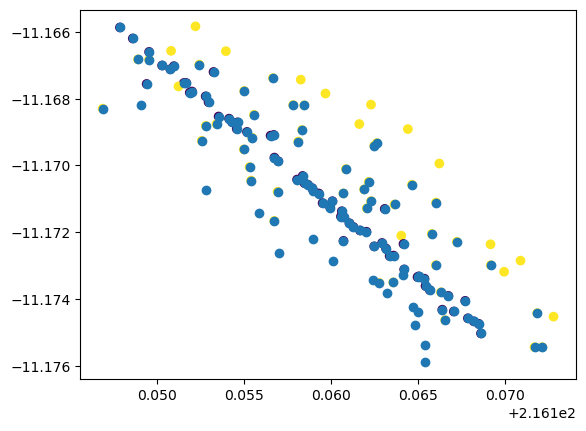

In [156]:
i = 16
p = search.hough.X[search.results[i].close]
plt.scatter(p[:, 0], p[:, 1], c=search.results[i].regression_result.outliers_r)
# plt.show()
p = search.hough.X[search.results[i].refined]
plt.scatter(p[:, 0], p[:, 1])
plt.show()

In [145]:
search.results[i].regression_result.beta

array([[-0.11838773,  0.08292551]])

In [62]:
pg = "20190403/A0c"
detector = 5
snr = 3

search_path = f"../search/DEEP/{pg}/detector_{detector}/snr_{snr}"


with open(f"{search_path}/recover.pkl", "rb") as fd:
    recovery = pickle.load(fd)
    
with open(f"{os.path.dirname(search_path)}/fakes.pkl", "rb") as fd:
    fakes = pickle.load(fd)
    
with open(f"{search_path}/search.pkl", "rb") as fd:
    search = pickle.load(fd)    
    
with open(f"{search_path}/catalog.pkl", "rb") as fd:
    catalog = pickle.load(fd)    

In [ ]:
search.

In [ ]:
# I want...to know if I found an object
# What this means is: is there a result where > 50% of the detections belong to a fake?

In [66]:
catalog.num_times

104

In [88]:
def did_find(catalog, fakes, results, recover_results):
    import numpy as np
    
    orbits = recovery['search']['detections'].keys()

    result_metrics = {}
    possible_to_find = {}
    did_find = {}
    for orbit in orbits:
        possible_orbit_detections = recovery['search']['detections'][orbit]
        """
        This doesn't account for velocity
        """
        if possible_orbit_detections < (catalog.num_times / 2):
            possible_to_find[orbit] = False
            print(orbit, "cannot be found", possible_orbit_detections, (catalog.num_times / 2))
            continue

        possible_to_find[orbit] = True

        orbit_detections = recovery['result']['detections'][orbit]
        result_metrics[orbit] = []
        purities = []
        for i, result in enumerate(search.results):
            num_fake_detections = orbit_detections[i]
            num_result_detections = result.close.sum()
            purity = num_fake_detections / num_result_detections
            accuracy = num_fake_detections / possible_orbit_detections
            result_metrics[orbit].append(
                dict(
                    purity=purity,
                    accuracy=accuracy,
                    possible_orbit_detections=possible_orbit_detections,
                    num_fake_detections=num_fake_detections,
                    num_result_detections=num_result_detections, 
                )
            )
            purities.append(purity)

        did_find[orbit] = np.where(np.array(purities) > 0.5)[0]

    return did_find

did_find(catalog, fakes, search.results, recovery)

10564514 cannot be found 0 52.0
13820098 cannot be found 41 52.0
13842309 cannot be found 5 52.0
13396487 cannot be found 13 52.0
14967241 cannot be found 17 52.0
12436625 cannot be found 6 52.0
11858007 cannot be found 12 52.0
14674042 cannot be found 8 52.0


{13711875: array([14]),
 10451789: array([3]),
 14795314: array([5]),
 13008433: array([13])}

In [89]:
fakes

RA,DEC,EXPNUM,CCDNUM,ORBITID,aei,mjd_mid,TDB,xv,H_VR,AMP,PERIOD,PHASE,d,observatory,r,MAG,type
float64,float64,int32,int64,int64,float64[6],float64,float64,float64[6],float64,float64,float64,float64,float64,float64[3],float64,float64,str8
-143.72816288558613,-11.279752033019319,845872,5,13396487,5.357177101173301 .. 18.075007075011893,58577.21447994315,19.254525066949327,-3.778817828705714 .. -1.5717155460400805,19.41646864057725,0.0,0.0,0.0,4.456827177927783,-0.9723130239773092 .. -0.09252563558321852,3.5240438714907114,25.39680414154894,asteroid
-143.84080495163397,-11.222425883268423,845872,5,14674042,5.893379973528605 .. 15.789169392491957,58577.21447994315,19.254525066949327,-5.3450880670633 .. 0.3906130225929234,17.653149562643897,0.2528313799989915,3266.341452222519,5.915319828650051,6.44104765572963,-0.9723130239773092 .. -0.09252563558321852,5.515984143984087,25.42065992196925,asteroid
-143.59998952843404,-11.22267253864958,845872,5,11858007,2.938852356957645 .. 21.988160177684584,58577.21447994315,19.254525066949327,-2.93070620407332 .. -0.7099764980790542,20.452384345553277,0.34204702801193937,1404.6168664558693,4.760902466754454,3.3353460509740387,-0.9723130239773092 .. -0.09252563558321852,2.3845543088610786,25.21849646313006,asteroid
-143.70614198748325,-11.157306461398147,845872,5,10564514,4.744124923146405 .. 21.15054193472637,58577.21447994315,19.254525066949327,-3.9455578254944155 .. 1.098775372869229,19.875462693294573,0.0173926475058557,665.1169914409637,3.20855259336801,4.647007922943385,-0.9723130239773092 .. -0.09252563558321852,3.7123867517674323,26.04233609781812,asteroid
-143.67888281817218,-11.204631450425246,845872,5,10451789,5.3421973908749365 .. 15.558735994432258,58577.21447994315,19.254525066949327,-4.5010411303553655 .. -1.453173391303614,16.862270064643702,0.0,0.0,0.0,5.3753177090581925,-0.9723130239773092 .. -0.09252563558321852,4.447328732257841,23.754786918061548,asteroid
-143.69439056680537,-11.27393391185099,845872,5,12436625,5.447962458411865 .. 20.70292522989198,58577.21447994315,19.254525066949327,-3.9376320808456766 .. -1.7913180307293644,19.43933949697458,0.0,0.0,0.0,4.643836877751502,-0.9723130239773092 .. -0.09252563558321852,3.710375211716442,25.62081342652167,asteroid
-143.66507946305066,-11.225567653658924,845872,5,13842309,4.537395531405139 .. 16.72987199429182,58577.21447994315,19.254525066949327,-4.183508558432402 .. 0.7725485377612478,19.04698411670419,0.0,0.0,0.0,4.980440132098472,-0.9723130239773092 .. -0.09252563558321852,4.051617241578065,25.57146478960704,asteroid
-143.81378978327007,-11.217912919038355,845872,5,14795314,4.704396013194087 .. 17.63447311866335,58577.21447994315,19.254525066949327,-3.6626768271945007 .. -0.4040168765990193,16.84057920403729,0.0,0.0,0.0,4.308893067594262,-0.9723130239773092 .. -0.09252563558321852,3.375036211053648,22.653799970293626,asteroid
-143.69828846710124,-11.177950522452008,845872,5,13711875,2.916779176405271 .. 19.650958480950443,58577.21447994315,19.254525066949327,-2.392526038320439 .. -0.49491561031915154,17.29793635412144,0.0,0.0,0.0,2.5489702106745993,-0.9723130239773092 .. -0.09252563558321852,1.560542918428476,20.29613874022196,asteroid


In [73]:
orbits = recovery['search']['detections'].keys()

result_metrics = {}
possible_to_find = {}
did_find = {}
for orbit in orbits:
    possible_orbit_detections = recovery['search']['detections'][orbit]
    
    if possible_orbit_detections < (catalog.num_times / 2):
        possible_to_find[orbit] = False
        print(orbit, "cannot be found", possible_orbit_detections, (catalog.num_times / 2))
        continue

    possible_to_find[orbit] = True

    orbit_detections = recovery['result']['detections'][orbit]
    result_metrics[orbit] = []
    purities = []
    for i, result in enumerate(search.results):
        num_fake_detections = orbit_detections[i]
        num_result_detections = result.close.sum()
        purity = num_fake_detections / num_result_detections
        accuracy = num_fake_detections / possible_orbit_detections
        result_metrics[orbit].append(
            dict(
                purity=purity,
                accuracy=accuracy,
                possible_orbit_detections=possible_orbit_detections,
                num_fake_detections=num_fake_detections,
                num_result_detections=num_result_detections, 
            )
        )
        purities.append(purity)
    
    did_find[orbit] = np.where(np.array(purities) > 0.5)[0]

did_find

10564514 cannot be found 0 52.0
13820098 cannot be found 41 52.0
13842309 cannot be found 5 52.0
13396487 cannot be found 13 52.0
14967241 cannot be found 17 52.0
12436625 cannot be found 6 52.0
11858007 cannot be found 12 52.0
14674042 cannot be found 8 52.0


{13711875: array([14]),
 10451789: array([3]),
 14795314: array([5]),
 13008433: array([13])}

13711875 20.29613874022196
10451789 23.754786918061548
14795314 22.653799970293626
13008433 24.037339095089585


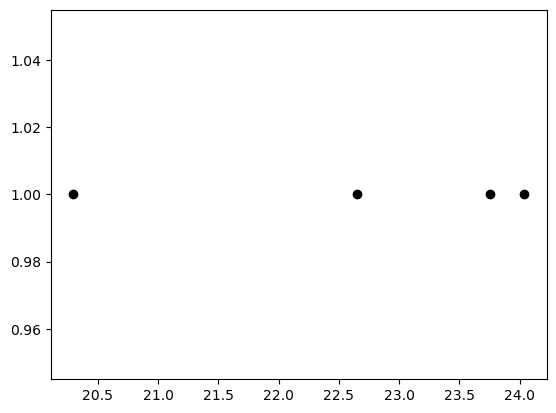

In [80]:
for orbit in did_find:
    d = fakes[fakes['ORBITID'] == orbit]
    mag = d[0]['MAG']
    print(orbit, mag)
    plt.scatter(mag, len(did_find[orbit]), c='k')

plt.show()

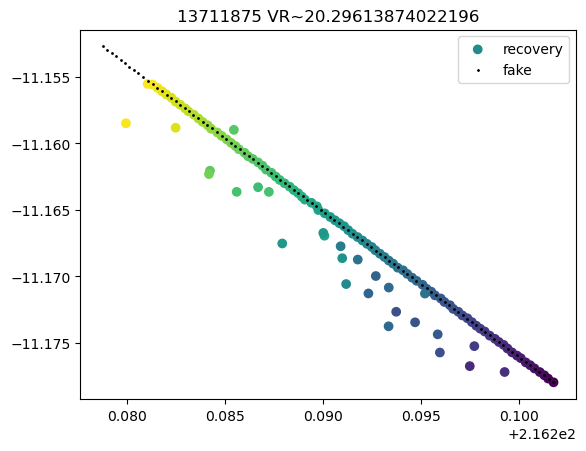

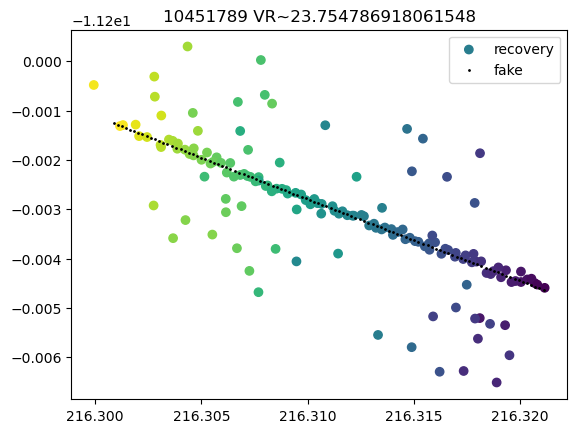

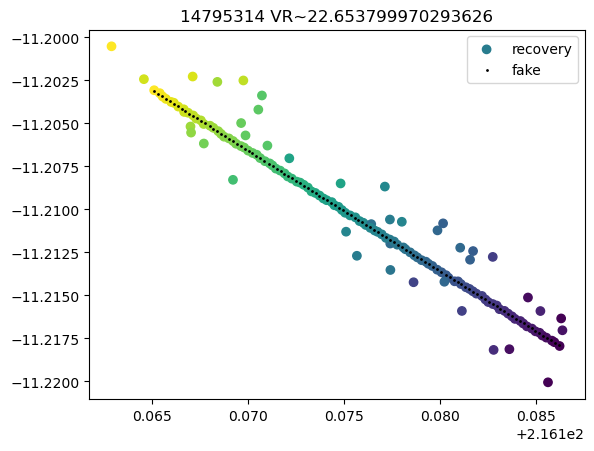

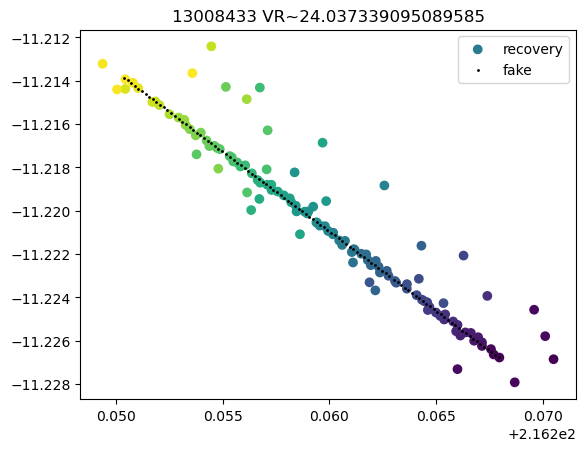

In [87]:
for orbit in did_find:
    result_fakes = fakes[fakes['ORBITID'] == orbit]
    mag = result_fakes[0]['MAG']
    for result in np.array(search.results)[did_find[orbit]]:
        points = search.hough.X[result.close]
        point_coord = SkyCoord(points[:, 0]*u.deg, points[:, 1]*u.deg)
        fake_coord = SkyCoord(result_fakes['RA']*u.deg, result_fakes['DEC']*u.deg)
        plt.scatter(point_coord.ra, point_coord.dec, c=points[:, 2], label="recovery")
        plt.scatter(fake_coord.ra, fake_coord.dec, c="k", s=1, label="fake")
        plt.title(f"{orbit} VR~{mag}")
        plt.legend()
        plt.show()
    

In [30]:
type(recovery['result']['detections'][10564514])

list

In [ ]:
for fake in recovery['result']['detections']:
    n = recovery['search']['detections'][fake]
    

In [19]:
result = search.results[2]

In [22]:
result_fakes = fakes[fakes['ORBITID'] == 14795314]


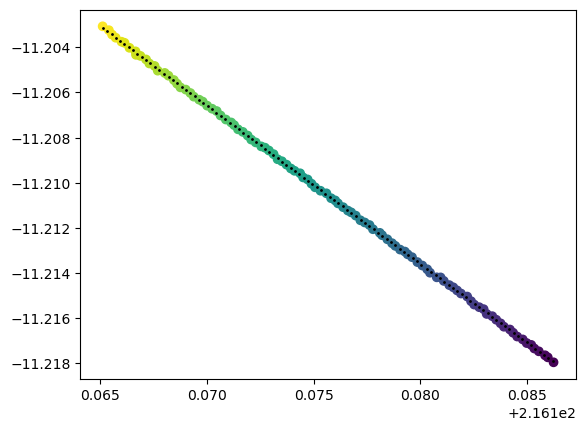

In [25]:


points = search.hough.X[result.close]
point_coord = SkyCoord(points[:, 0]*u.deg, points[:, 1]*u.deg)
fake_coord = SkyCoord(result_fakes['RA']*u.deg, result_fakes['DEC']*u.deg)
plt.scatter(point_coord.ra, point_coord.dec, c=points[:, 2])
plt.scatter(fake_coord.ra, fake_coord.dec, c="k", s=1)
plt.show()